# **Machine Learning with scikit-learn**

Website link: [scikit-learn](https://scikit-learn.org/stable/)

# **Linear Regression**

In [ ]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#load the dataset
df=pd.read_csv("nasdaq100.csv")
df

,Date;Starting (USD);Ending (USD)
0,01.01.24;16800;16500
1,01.12.23;15900;16100
2,01.11.23;15800;15300
3,01.10.23;16100;16200
4,01.09.23;16300;15700
5,01.08.23;16800;16400
6,01.07.23;15900;16200
7,01.06.23;15800;15500
8,01.05.23;16150;16100
9,01.04.23;16300;15800


In [ ]:
#if we want to separate by semicolon
df=pd.read_csv("nasdaq100.csv", sep=';')
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [ ]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [ ]:
#check whether there is null value or not
df.isnull().sum()

,0
Date,0
Starting (USD),0
Ending (USD),0


In [ ]:
#delete the Date
df=df.drop(columns=['Date'])
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


In [ ]:
#another way to remove Date
#df.drop('Date',axis=1) #axis=1 if we want to remove column, if row, then axis=0
#df.head()

In [ ]:
#separate the X and Y data
X=df['Starting (USD)']
Y=df['Ending (USD)']

In [ ]:
#Another way to separate X and Y
X=df.drop('Ending (USD)',axis=1)
X.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [ ]:
Y=df.drop('Starting (USD)',axis=1)
Y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

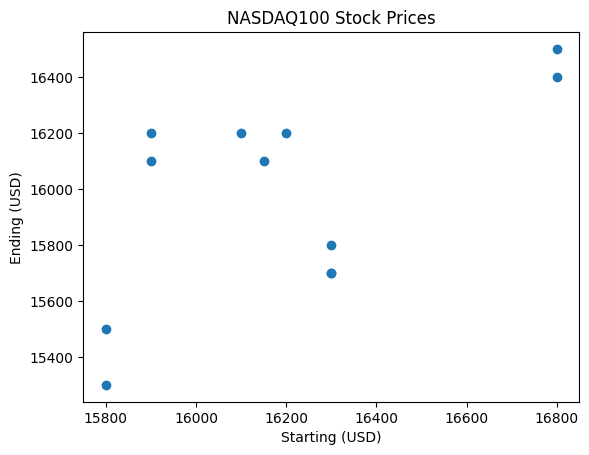

In [ ]:
#Scatter plot
plt.scatter(X,Y)
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [ ]:
#Apply Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression() #Create an object

In [ ]:
y_mean=Y.mean()

In [ ]:
x_mean=X.mean()

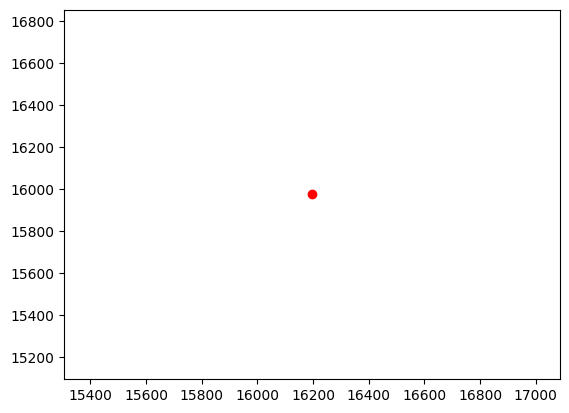

In [ ]:
plt.scatter(x_mean,y_mean, color='red')
#best fit line will pass through this point

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

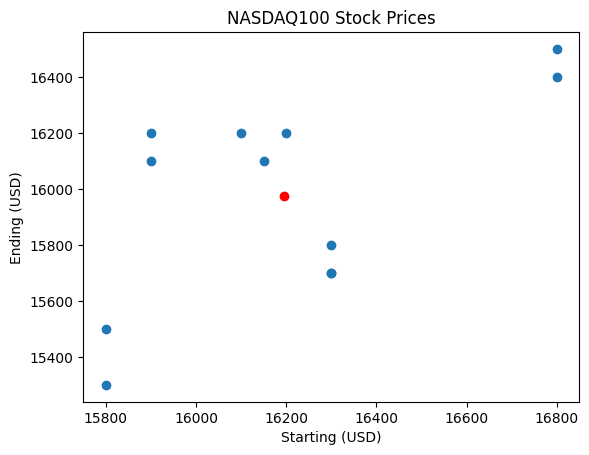

In [ ]:
#Scatter plot of both cases
plt.scatter(x_mean,y_mean, color='red')
plt.scatter(X,Y)
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [ ]:
#train the model
lr.fit(X,Y)

LinearRegression()

In [ ]:
m=lr.coef_
m

array([[0.65258293]])

In [ ]:
c=lr.intercept_
c

array([5405.87555702])

In [ ]:
#Predict the Result for unknown variable 16700
#Y=mX+c
m*16700+c

array([[16304.0105628]])

In [ ]:
#using function rather than equation
lr.predict([[16700]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [ ]:
#calculate predicted Y based on the model
df['Predicted_Y']=lr.predict(X)
df.head()

,Starting (USD),Ending (USD),Predicted_Y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

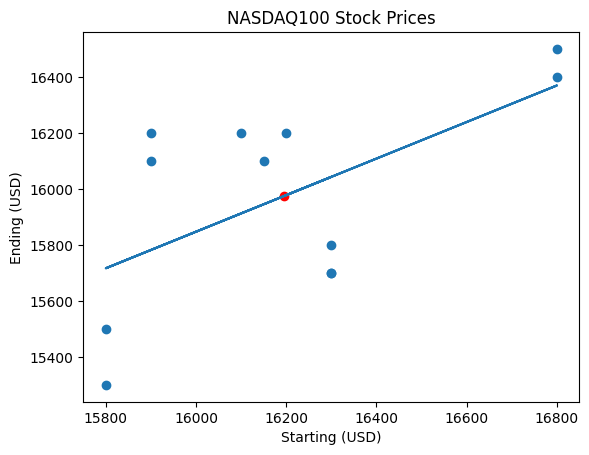

In [ ]:
plt.plot(X,df['Predicted_Y'])
plt.scatter(x_mean,y_mean, color='red')
plt.scatter(X,Y)
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

**Loss and Cost function**

In [ ]:
#loss function
df['loss']=df['Ending (USD)']-df['Predicted_Y']
df.head()

,Starting (USD),Ending (USD),Predicted_Y,loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [ ]:
#cost function (MSE and MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse=mean_squared_error(df['Ending (USD)'],df['Predicted_Y'])
mse

80411.23397700385

In [ ]:
mae=mean_absolute_error(df['Ending (USD)'],df['Predicted_Y'])
mae

260.3840017604666

In [ ]:
#Performance of the model
lr.score(X,Y)

0.3577804940272571

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

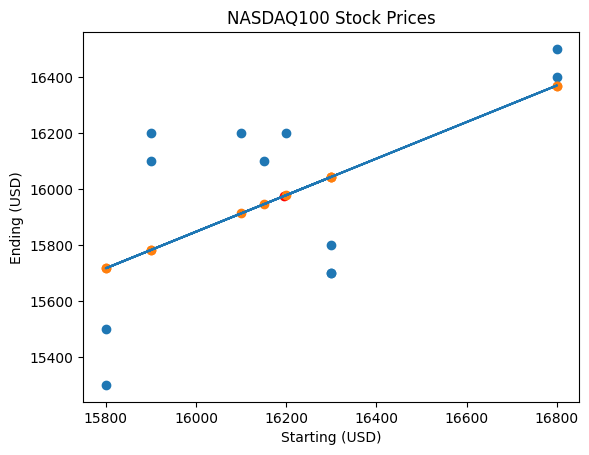

In [ ]:
plt.plot(X,df['Predicted_Y'])
plt.scatter(x_mean,y_mean, color='red')
plt.scatter(X,Y)
plt.scatter(X,lr.predict(X))
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [ ]:
#R2 squared value/ Accuracy for Regression
from sklearn.metrics import r2_score
r2_score(Y,lr.predict(X))

0.3577804940272571